In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

Importing data 

In [25]:
df = pd.read_csv("country_wise_latest.csv") 

In [26]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


# Data Cleaning  and refacturing

In [27]:
df.index

RangeIndex(start=0, stop=187, step=1)

In [28]:
df.shape

(187, 15)

In [29]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [30]:
df.drop(["Deaths / 100 Cases" , "Recovered / 100 Cases" , "Deaths / 100 Recovered"] , axis=1 , inplace=True) 

In [31]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country/Region       187 non-null    object 
 1   Confirmed            187 non-null    int64  
 2   Deaths               187 non-null    int64  
 3   Recovered            187 non-null    int64  
 4   Active               187 non-null    int64  
 5   New cases            187 non-null    int64  
 6   New deaths           187 non-null    int64  
 7   New recovered        187 non-null    int64  
 8   Confirmed last week  187 non-null    int64  
 9   1 week change        187 non-null    int64  
 10  1 week % increase    187 non-null    float64
 11  WHO Region           187 non-null    object 
dtypes: float64(1), int64(9), object(2)
memory usage: 17.7+ KB


In [32]:
df.isnull().sum() 

Country/Region         0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
New cases              0
New deaths             0
New recovered          0
Confirmed last week    0
1 week change          0
1 week % increase      0
WHO Region             0
dtype: int64

In [33]:
df.rename(columns={"Country/Region" : "Country"} , inplace=True  )

Ratios

In [34]:
df["Death rate"] = (df["Deaths"] / df["Confirmed"]) * 100
df["Recovered rate"] = (df["Recovered"] / df["Confirmed"]) * 100
df["Active rate"] = (df["Active"] / df["Confirmed"]) * 100

### In above section we can see there was no nan values so i did not drop any rows but i did remove 3 cols which i think is not neccessary for us

# Understanding Dataset

In [35]:
df["Country"].nunique() 

187

In [36]:
df.describe() 

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Confirmed last week,1 week change,1 week % increase,Death rate,Recovered rate,Active rate
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,7.868248e+04,9448.459893,13.606203,3.019317,64.820337,32.160346
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.382737e+05,47491.127684,24.509838,3.454389,26.287763,25.928633
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+01,-47.000000,-3.840000,0.000000,0.000000,0.000000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,1.051500e+03,49.000000,2.775000,0.942065,48.769946,10.678243
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,5.020000e+03,432.000000,6.890000,2.151623,71.315860,26.247511
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.708050e+04,3172.000000,16.855000,3.874109,86.884409,48.086824
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,3.834677e+06,455582.000000,226.320000,28.562980,100.000000,100.000000


### in above section we can see confirmed cases , deaths , recovered and active counts
### we can also see the minimum , max and average cases in whole world 

# EDA (Exploratary Data Analysis)

<Axes: xlabel='WHO Region', ylabel='Confirmed'>

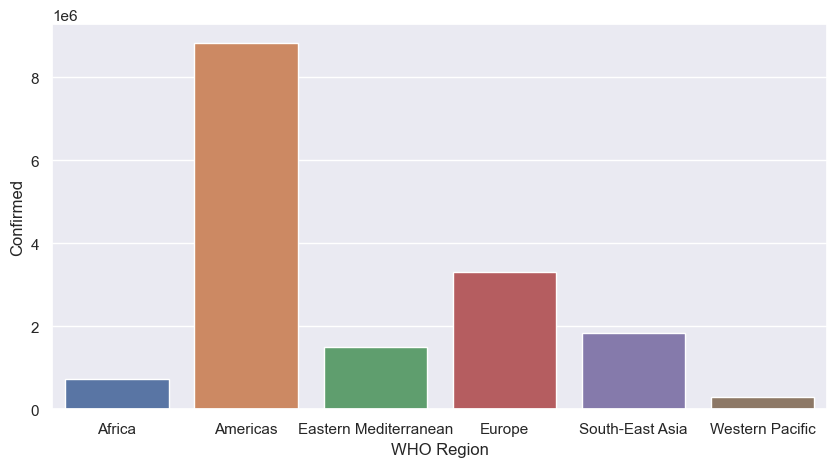

In [37]:
plt.figure(figsize=(10,5))
region_case = df.groupby("WHO Region")["Confirmed"].sum()
region_case = region_case.reset_index()
sns.barplot(data = region_case , x="WHO Region" ,y="Confirmed" , hue="WHO Region")


## in this Plot we can see that the American region is most affected by the virus and Western pacific is the least 

In [38]:
america_df = df[df["WHO Region"] == "Americas"] 

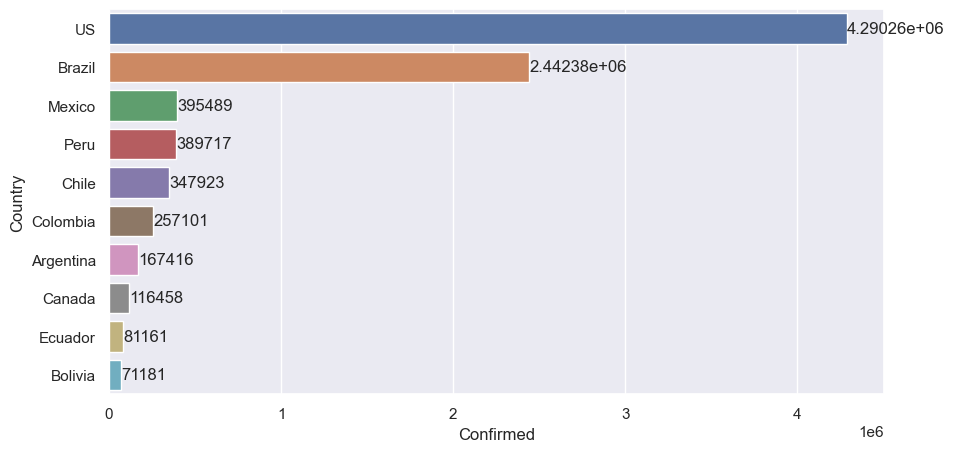

In [39]:
america_case = america_df.groupby("Country")["Confirmed"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
america_case = america_case.reset_index()
ax = sns.barplot(data=america_case , y="Country" , x="Confirmed" , hue="Country") 
for bars in ax.containers :
    ax.bar_label(bars) 

## This plot displays that the US is the most affected Country in American region and Bolivia is least  

Text(0.5, 1.0, 'Total Recovered')

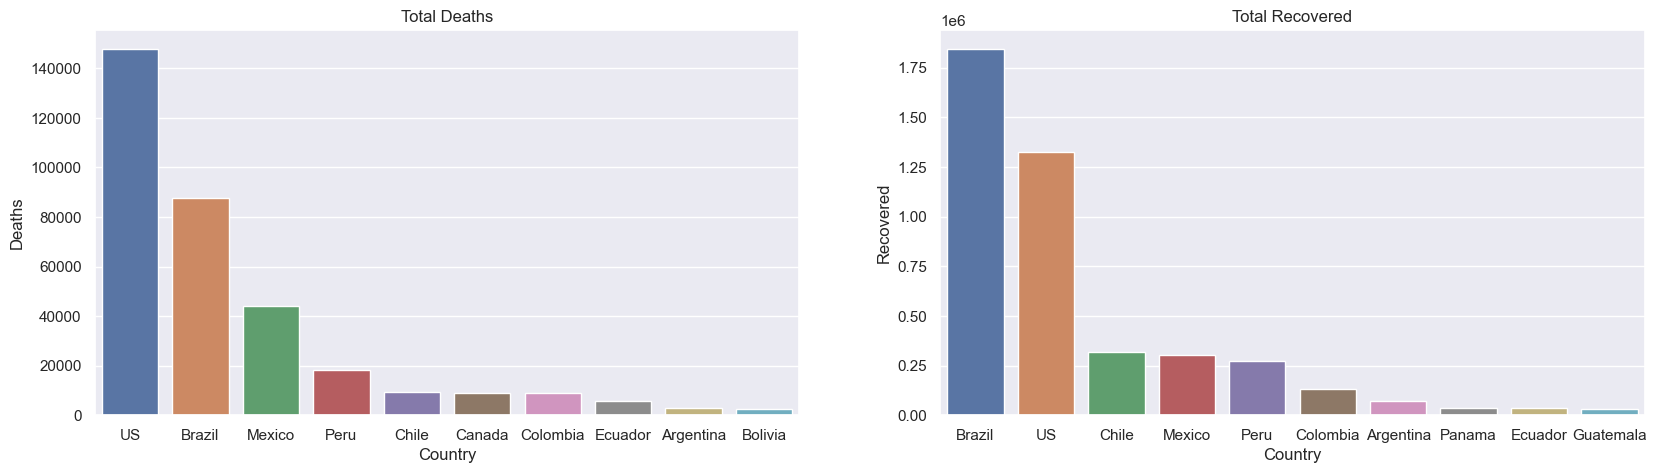

In [40]:
america_dth = america_df.groupby("Country")["Deaths"].sum().sort_values(ascending=False).head(10).reset_index() 
america_rec = america_df.groupby("Country")["Recovered"].sum().sort_values(ascending=False).head(10).reset_index() 
fig , axes = plt.subplots(figsize=(20,5) ,nrows=1 , ncols=2) 
sns.barplot(data= america_dth , x="Country" , y="Deaths" , hue = "Country", ax=axes[0] )
sns.barplot(data=america_rec  , x="Country" , y="Recovered" , hue= "Country" , ax=axes[1])  
axes[0].set_title("Total Deaths") 
axes[1].set_title("Total Recovered") 


## Total deaths and totall recovred in the American region US suffered more death than the others and Brazil has more recovered patients than others 

<Axes: xlabel='Country', ylabel='Active'>

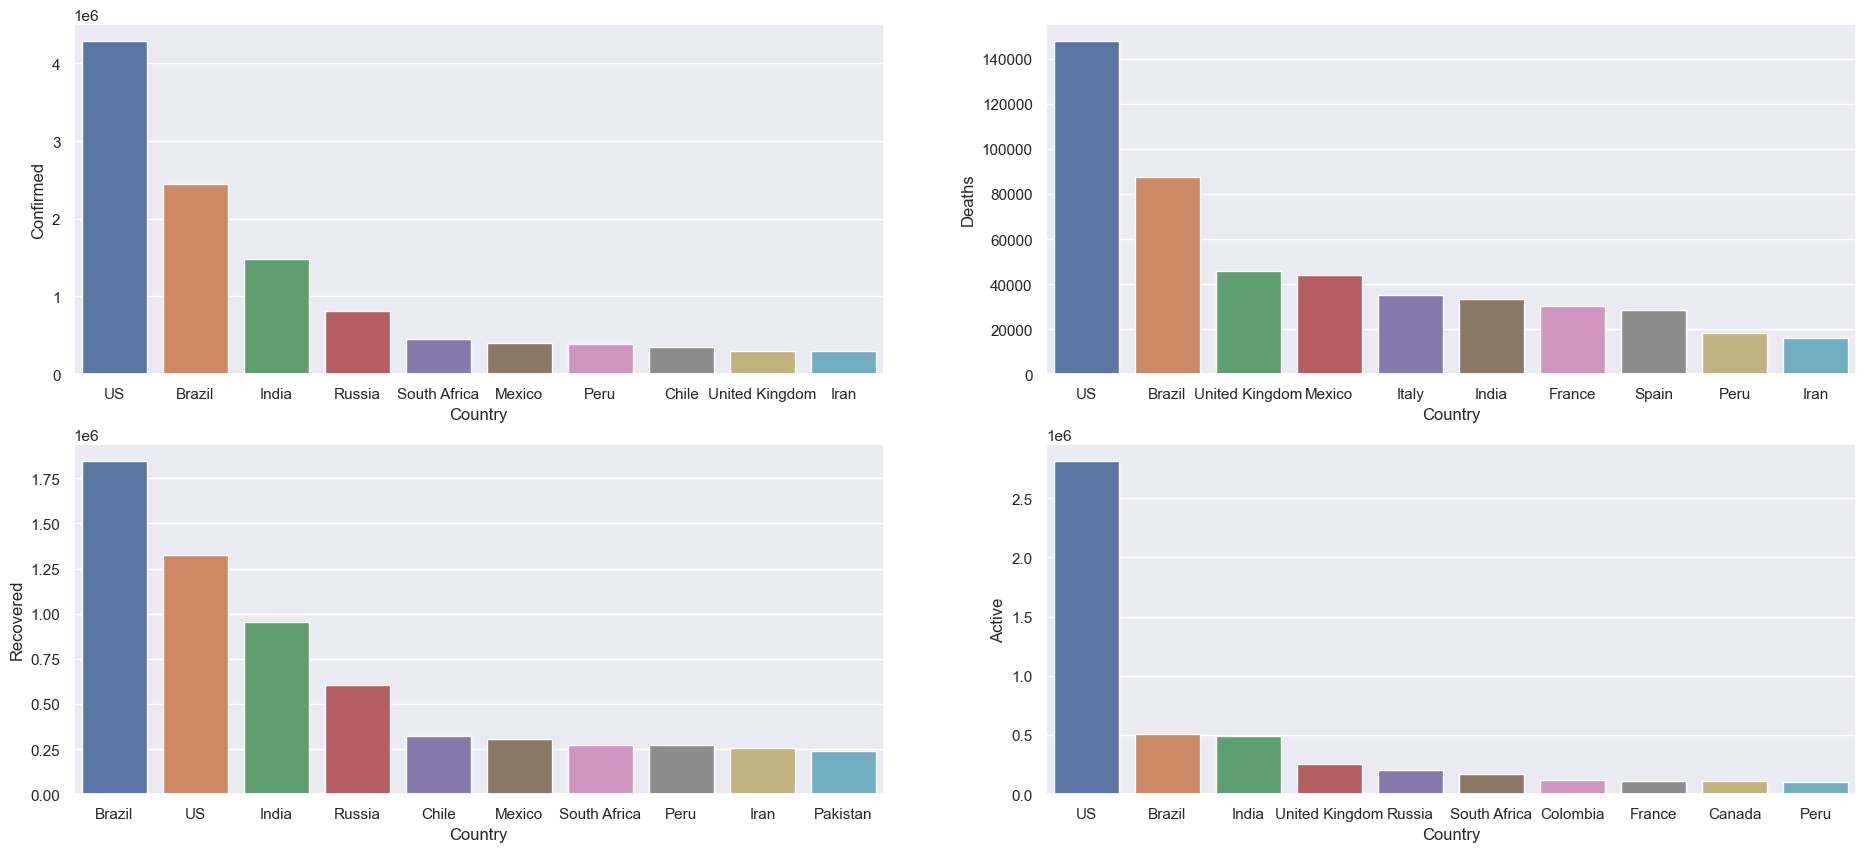

In [42]:
top10_conf = df.groupby("Country")["Confirmed"].sum().sort_values(ascending=False).head(10).reset_index()
top10_dth = df.groupby("Country")["Deaths"].sum().sort_values(ascending=False).head(10).reset_index()
top10_rec = df.groupby("Country")["Recovered"].sum().sort_values(ascending=False).head(10).reset_index()
top10_act = df.groupby("Country")["Active"].sum().sort_values(ascending=False).head(10).reset_index()

fig,axes = plt.subplots(figsize=(23,10) , ncols=2,nrows=2) 
sns.barplot(data= top10_conf , x="Country" , y="Confirmed" , hue="Country" , ax=axes[0][0])
sns.barplot(data= top10_dth , x="Country" , y="Deaths" , hue="Country" , ax=axes[0][1])
sns.barplot(data= top10_rec , x="Country" , y="Recovered" , hue="Country" , ax=axes[1][0])
sns.barplot(data= top10_act , x="Country" , y="Active" , hue="Country" , ax=axes[1][1])

## And these plots shows the overall Confirmed , Deaths , Recovered , Active cases of top 10 countries 

<Axes: xlabel='New cases', ylabel='WHO Region'>

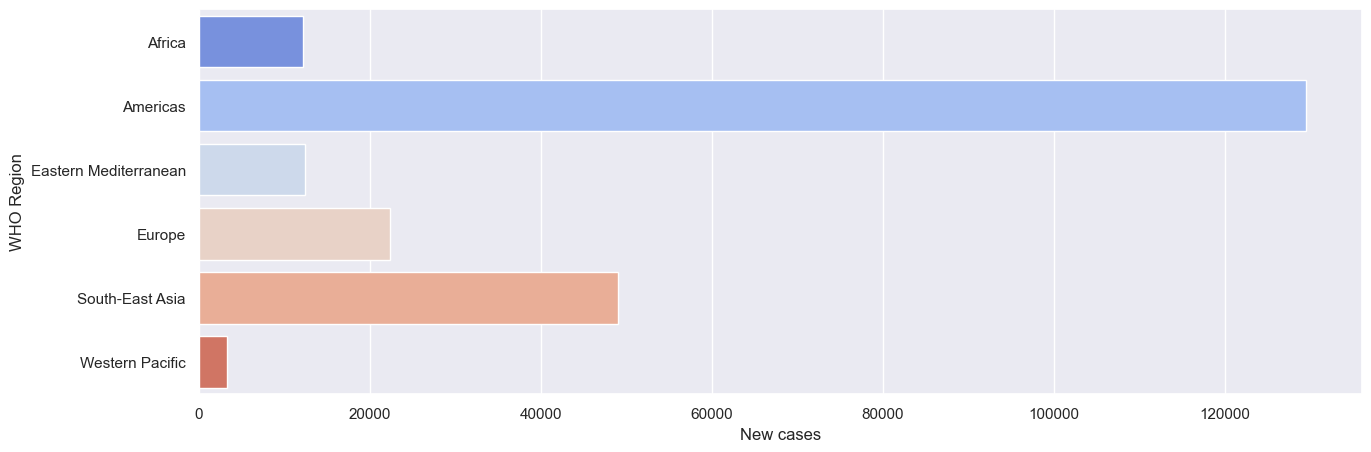

In [43]:
sns.set(rc={"figure.figsize" : (15,5)})
region_new = df.groupby("WHO Region")["New cases"].sum().reset_index() 
sns.barplot(data= region_new , x="New cases" , y="WHO Region" , hue="WHO Region" , palette="coolwarm") 


## This plot shows the new cases in each region 

<Axes: xlabel='WHO Region', ylabel='1 week % increament'>

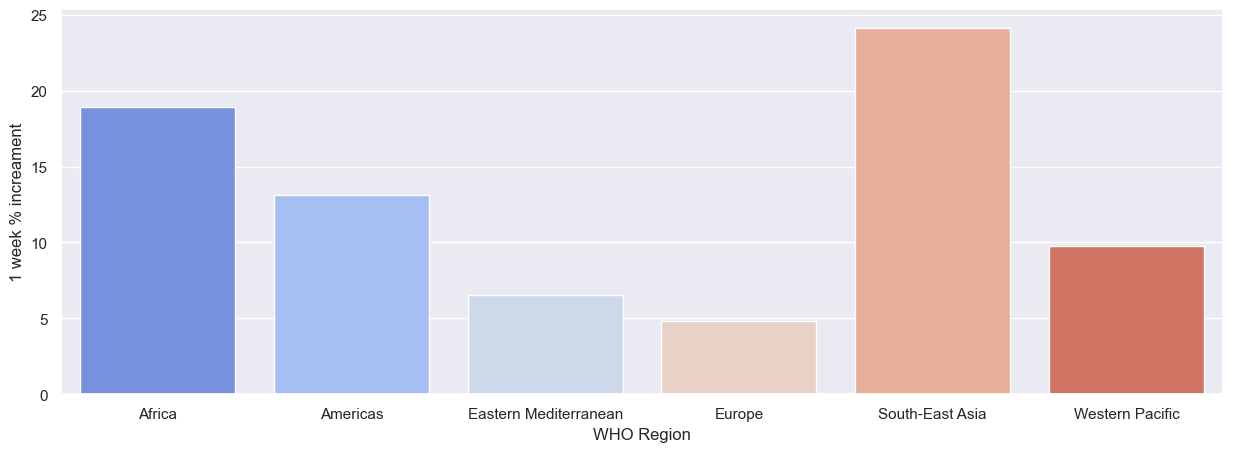

In [44]:
region_week = df.groupby("WHO Region").sum()[["Confirmed last week" , "1 week change"]]
region_week["1 week % increament"] = (region_week["1 week change" ] / region_week["Confirmed last week"]) * 100
region_weeko = region_week.reset_index() 
sns.barplot(data=region_week , x="WHO Region" , y="1 week % increament" , hue="WHO Region" , palette="coolwarm")

## And this plots shows the 1 week increament in cases from last week in percentage. And Sout-East-Asia has the most new cases increament in 1 week 

<Axes: xlabel='WHO Region', ylabel='New recovered'>

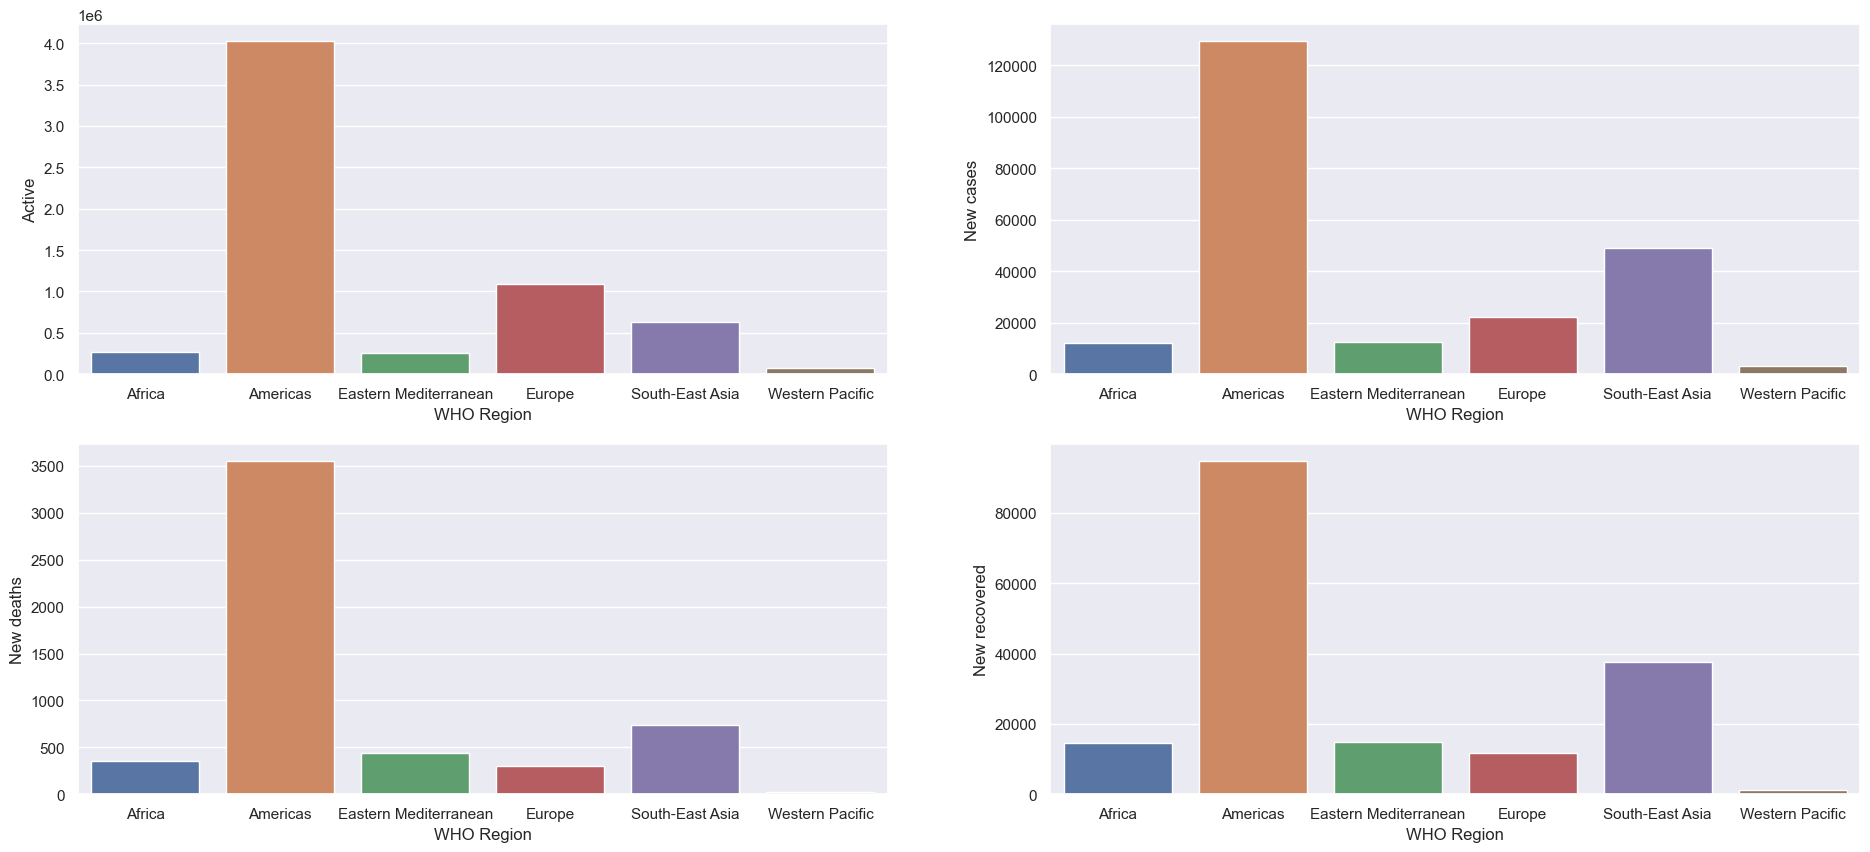

In [45]:
new_case = df.groupby("WHO Region")[["New cases" ,"New deaths" , "New recovered" , "Active"]].sum()
fig,axes = plt.subplots(ncols=2,nrows=2 , figsize=(23,10))
sns.barplot(data=new_case , x="WHO Region" , y="Active" ,hue="WHO Region" ,ax=axes[0][0])
sns.barplot(data=new_case , x="WHO Region" , y="New cases" , hue="WHO Region",ax=axes[0][1])
sns.barplot(data=new_case , x="WHO Region" , y="New deaths" , hue="WHO Region",ax=axes[1][0])
sns.barplot(data=new_case , x="WHO Region" , y="New recovered" , hue= "WHO Region",ax=axes[1][1])

## These plots shows the total Active , New cases , New deaths , New recoverd cases in all the Regions , and Amrecian region tops in all aspects 

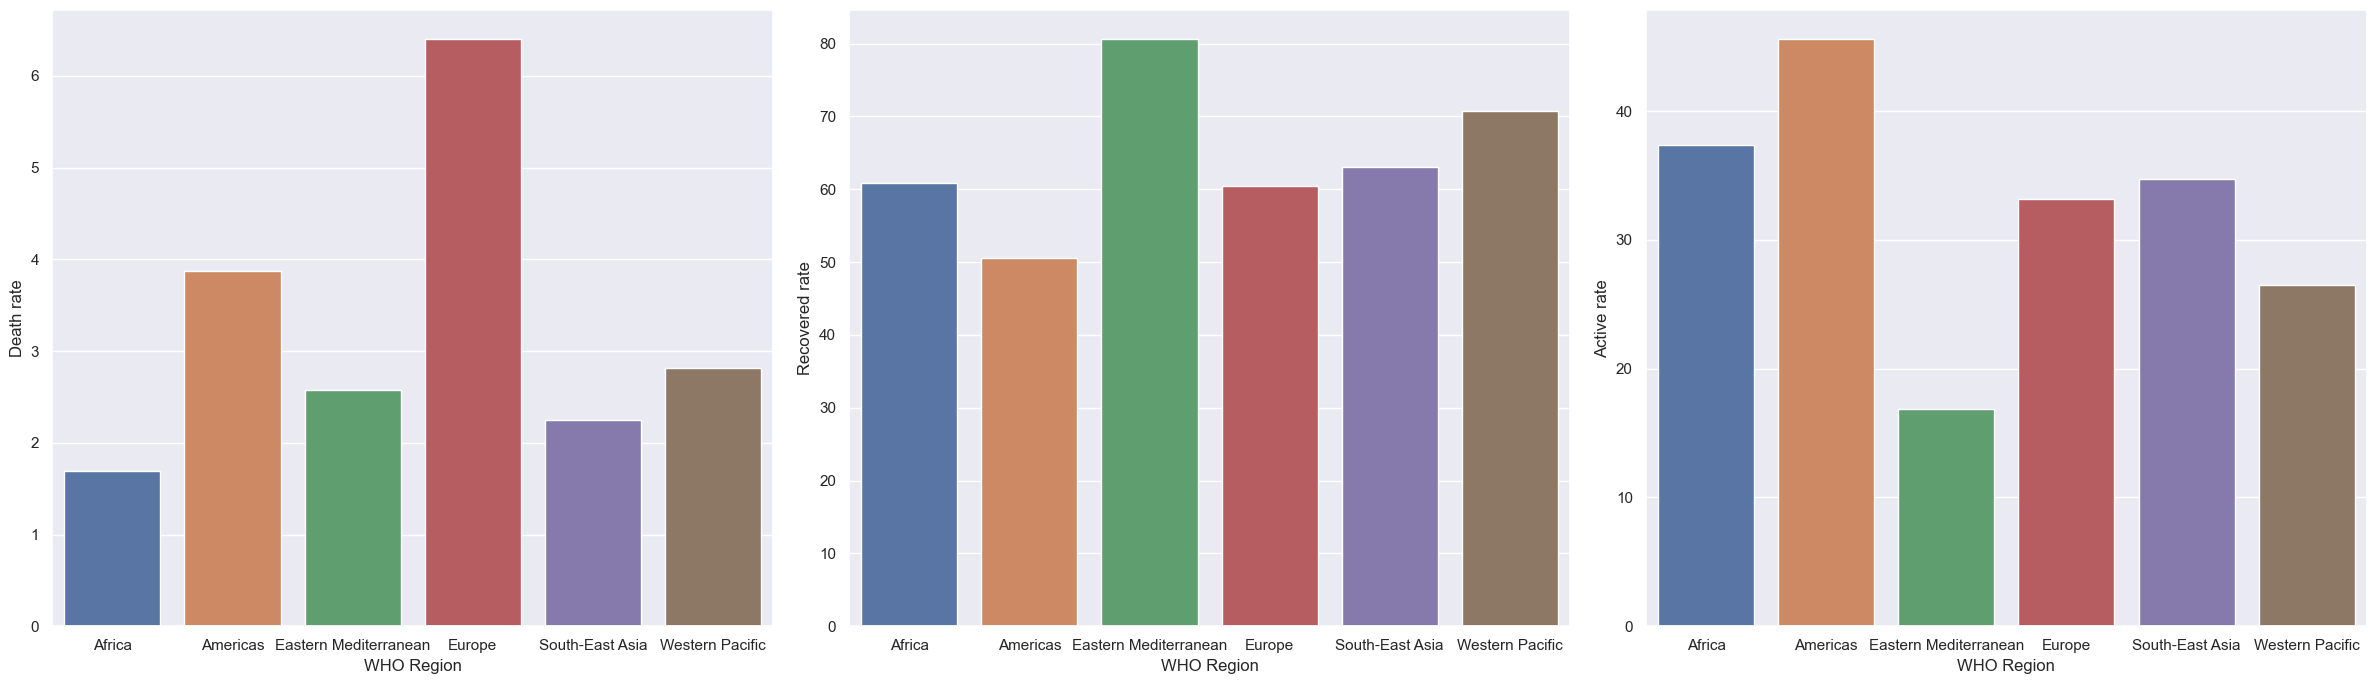

In [86]:
region_stats = df.groupby("WHO Region")[["Confirmed","Deaths" , "Recovered" , "Active"]].sum().reset_index() 
fig , axes = plt.subplots(figsize=(24,7) , ncols=3 , nrows=1)
region_stats["Death rate"] = (region_stats["Deaths"] / region_stats["Confirmed"]) * 100
region_stats["Recovered rate"] = (region_stats["Recovered"] / region_stats["Confirmed"]) * 100
region_stats["Active rate"] = (region_stats["Active"] / region_stats["Confirmed"]) * 100


sns.barplot(data= region_stats , x="WHO Region" , y="Death rate" , ax=axes[0] , hue="WHO Region")
sns.barplot(data= region_stats , x="WHO Region" , y="Recovered rate" , ax=axes[1] , hue="WHO Region")
sns.barplot(data= region_stats , x="WHO Region" , y="Active rate" , ax=axes[2] , hue="WHO Region")
plt.tight_layout() 

## Lastly this shows the Death, Recoverd, Active Rates of each Region

# Conclusion 

In this data set we came to know some major stats of Regions and country in covid times.
1. American has the most Confirmed cases and US has the highest confirmed cases in American region and deaths are also the highest in this country
2. Western Pacific region has the least cases overall
3. And Iran is the least affected country in top 10 of most affected countires
4. Death rate of Europe region is highest while least is Africa
5. Recovery rate of Eastern Mediterranean Region is is the highest while least is American region
6. Active of rate of American region is the highest while least is Eastern Mediterranean region
7. New cases , new recoverd , new deaths are also highest in American region
8. 1 week increament is highest in South East Asia 